In [1]:
pip install tensorflow


  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0


DEPRECATION: Loading egg at c:\users\rajmp\appdata\local\programs\python\python311\lib\site-packages\pycocotools-2.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastapi 0.104.0 requires typing-extensions>=4.8.0, but you have typing-extensions 4.5.0 which is incompatible.
pydantic 2.4.2 requires typing-extensions>=4.6.1, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.10.1 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.datasets import mnist
import keras

### Load the dataset

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
#normalize the data (max of 0-255 ,so divide by 255)
x_train=x_train/255
x_test=x_test/255

In [4]:
x_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [5]:
x_train.shape

(60000, 28, 28)

### Define Network Architecture

In [6]:
model=Sequential() #Sequential as a feed forward network
model.add(keras.layers.Flatten(input_shape=(28,28)))  #Flatten the input(i.e. convett to 1-D array) and provide the input size to the input layer
model.add(keras.layers.Dense(256,activation='relu'))  #Define the hidden layer with 128 nodes (<than 28x28) with Relu as activation function
model.add(keras.layers.Dense(10,activation='softmax'))#Define the output layer with 10 nodes (number of classes=10) with softmax activation function

### Train the model

In [7]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy']) #Compile the model using the SGD optimizer and metric accuracy
H=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10) #Fit the model for the training set and also providing the validation set and number of epochs

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6288 - accuracy: 0.8415 - val_loss: 0.3499 - val_accuracy: 0.9066
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3302 - accuracy: 0.9082 - val_loss: 0.2879 - val_accuracy: 0.9206
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2818 - accuracy: 0.9213 - val_loss: 0.2536 - val_accuracy: 0.9278
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2519 - accuracy: 0.9294 - val_loss: 0.2319 - val_accuracy: 0.9337
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2291 - accuracy: 0.9357 - val_loss: 0.2138 - val_accuracy: 0.9382
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2109 - accuracy: 0.9412 - val_loss: 0.1993 - val_accuracy: 0.9415
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1955 - accuracy: 0.9456 - val_loss: 0.1884 - val_ac

### Evaluate the model

In [8]:
test_loss,test_acc=model.evaluate(x_test,y_test) #evaluate the modelfor the test set
#Print the accuracy and the loss of the model
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1580 - accuracy: 0.9524
Loss=0.158
Accuracy=0.952


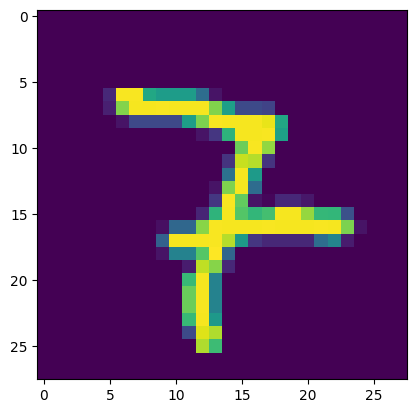

313/313 [==============================] - 1s 3ms/step
Digit is :  7


In [9]:
#Randomly choose any image from the test test and evaluate the predict of the model
import random
n=random.randint(0,9999) # choose random number between 0-9999
plt.imshow(x_test[n]) #display that image
plt.show()
pred=model.predict(x_test) #predict the output using the model
print("Digit is : " ,np.argmax(pred[n])) # print output

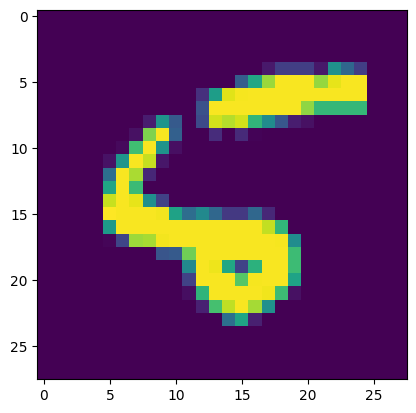

313/313 [==============================] - 1s 4ms/step
Digit is :  6


In [10]:
plt.imshow(x_test[8]) #display that image
plt.show()
pred=model.predict(x_test) #predict the output using the model
print("Digit is : " ,np.argmax(pred[8])) # print output

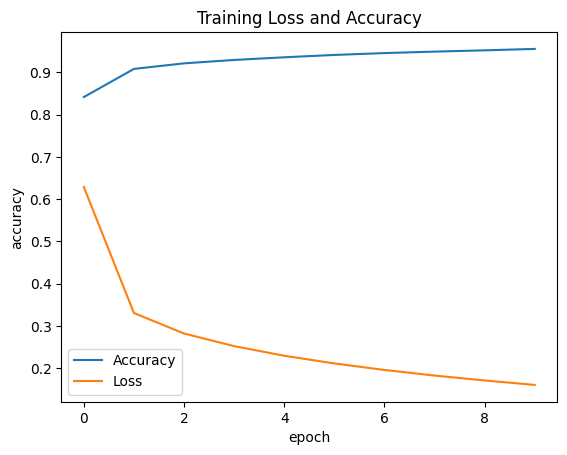

In [11]:
plt.plot(H.history['accuracy']) #get the accuracy for the training set from the model's history attribute
plt.plot(H.history['loss'])   #get the loss for the training set from the model's history attribute
plt.title('Training Loss and Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'])

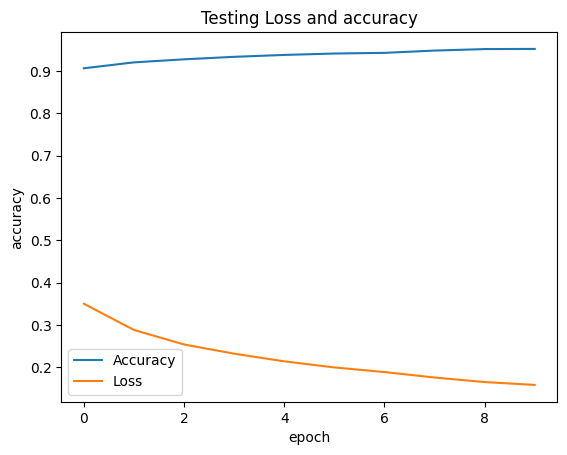

In [12]:
plt.plot(H.history['val_accuracy']) #get the accuracy for the validation set from the model's history attribute
plt.plot(H.history['val_loss']) #get the loss for the validation set from the model's history attribute
plt.title('Testing Loss and accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Accuracy', 'Loss'])